In [1]:
from tinygrad import Tensor, nn, TinyJit
import numpy as np
import matplotlib.pyplot as plt

In [3]:
names = open("./names.txt").read().splitlines()

In [4]:
SPECIAL_TOKEN = "."
vocab = [SPECIAL_TOKEN] + [chr(unicode) for unicode in range(ord("a"), ord("a") + 26)]
vocab_size = len(vocab)

In [5]:
def create_transition_matrix(names):
    N = np.zeros((vocab_size, vocab_size), dtype=int)

    for name in names:
        name_chars = [SPECIAL_TOKEN] + list(name) + [SPECIAL_TOKEN]
        for char_a, char_b in zip(name_chars, name_chars[1:]):
            N[vocab.index(char_a), vocab.index(char_b)] += 1

    return Tensor(N)

In [6]:
N = create_transition_matrix(names)

In [7]:
def draw_transition_matrix(N: Tensor):
    plt.figure(figsize=(16, 16))
    plt.imshow(N.numpy(), cmap="Blues")
    for i in range(vocab_size):
        for j in range(vocab_size):
            text = vocab[i] + vocab[j]
            plt.text(j, i, text, ha="center", va="bottom", color="gray")
            plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

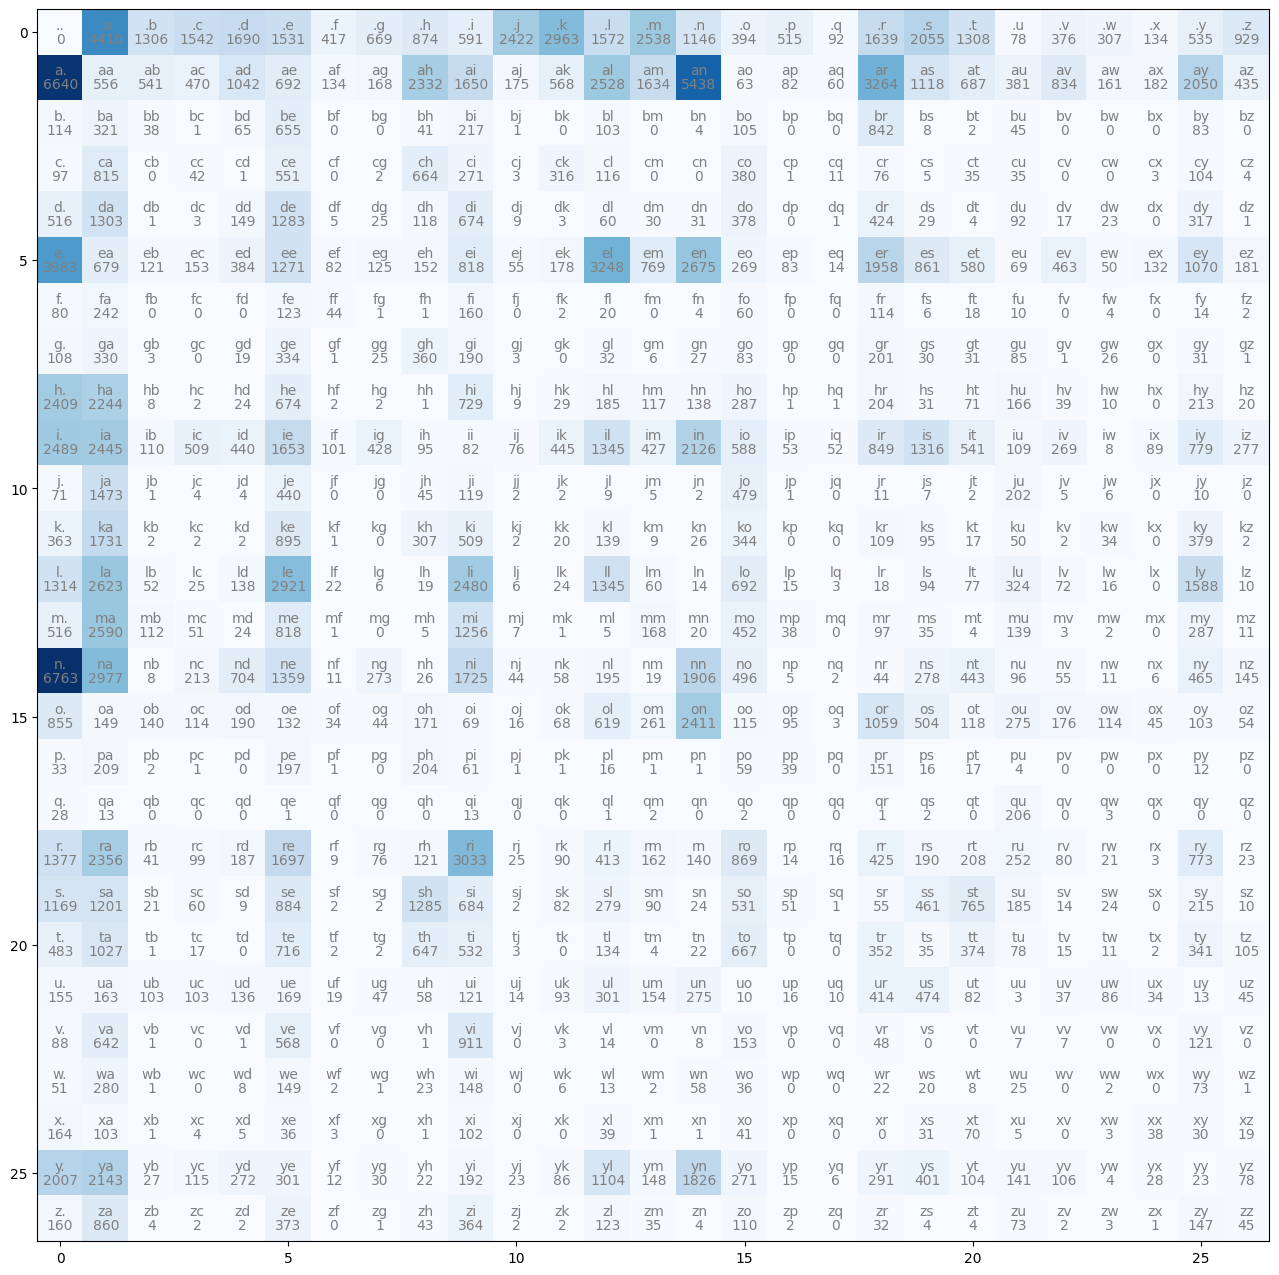

In [8]:
draw_transition_matrix(N)

In [9]:
P = N / N.sum(axis=1, keepdim=True)


def generate_word(starting_char=SPECIAL_TOKEN):
    current_char = starting_char
    word = "" if starting_char == SPECIAL_TOKEN else starting_char
    while True:
        current_char = np.random.choice(a=vocab, p=P[vocab.index(current_char)].numpy())
        if current_char == SPECIAL_TOKEN:
            return word
        word += current_char

In [10]:
generated_names = []
for _ in range(32000):
    generated_names.append(generate_word())

generated_names[:100]

['kh',
 'azikriyn',
 'bahiemandeyiylienclay',
 'hlakwioriacachevahahns',
 'n',
 'diasellelarmija',
 'a',
 'masamse',
 'ezan',
 'lyaym',
 'jen',
 'medeaakeklayxia',
 'reluelylely',
 'n',
 'solenhe',
 'rauedelateryuwan',
 'sluzysharqudin',
 'joui',
 'myn',
 'qumakemou',
 'za',
 'i',
 'avyamontorrry',
 'kollay',
 'badoveemiu',
 'ckai',
 's',
 'vrarean',
 'komiailan',
 'eylleykee',
 'ziaryon',
 'an',
 'alyll',
 'aralereemennencha',
 'ee',
 'jashn',
 'brahi',
 'th',
 'an',
 'ros',
 'mulely',
 'tanama',
 'keiss',
 'quszan',
 'renn',
 'dabalynylanenty',
 'e',
 'amjurl',
 'm',
 'iafiah',
 'gh',
 'ineirzaan',
 'ma',
 'lle',
 'sh',
 'lajulelerronge',
 'ze',
 'cxs',
 'tisone',
 'bela',
 'dele',
 'hasa',
 'vismay',
 'an',
 'nl',
 're',
 'meth',
 'aprlilayiosclen',
 'giaiconyambreyll',
 'firianenaluthlousiex',
 'milethannn',
 'k',
 'kha',
 'i',
 'lin',
 'aciaryv',
 'jari',
 'li',
 'lo',
 'n',
 'sh',
 'sed',
 'oshar',
 'wah',
 'ly',
 'ri',
 'bemon',
 'hennzlaronyvyn',
 'brdo',
 'daufenetima',
 't',


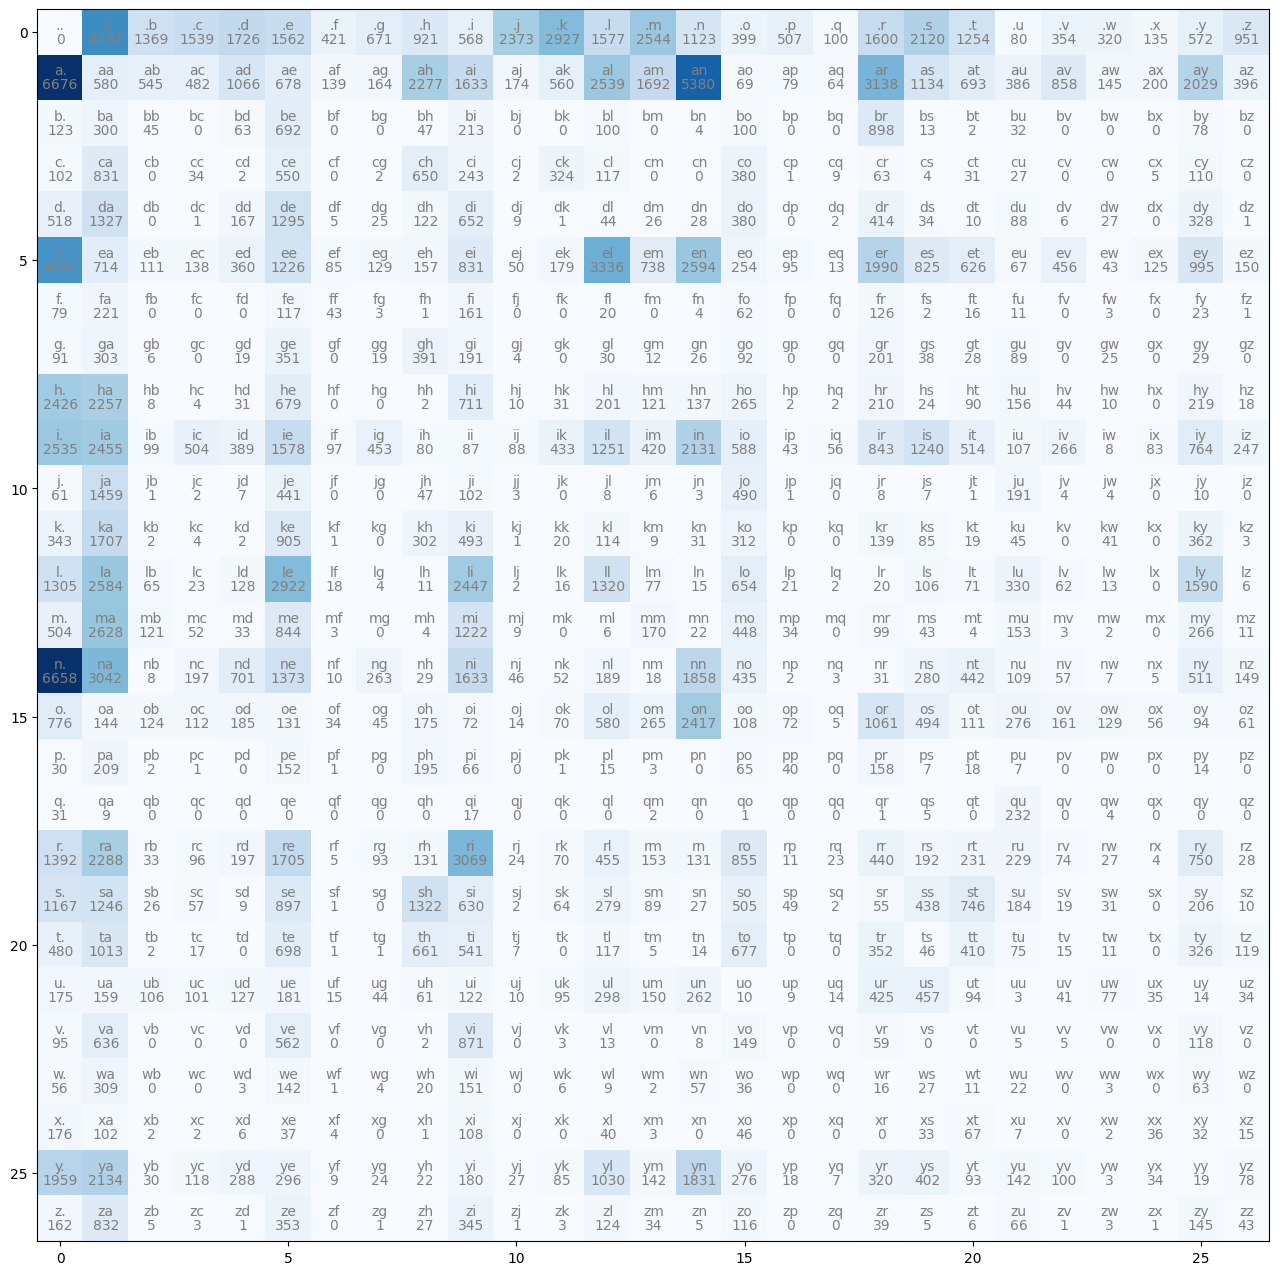

In [11]:
draw_transition_matrix(create_transition_matrix(generated_names))